# Visualisation

## An Altercation with Anscombe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
sns.set()

# Load the example dataset for Anscombe's quartet
anscombe_df = sns.load_dataset("anscombe")

In [3]:
anscombe_df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


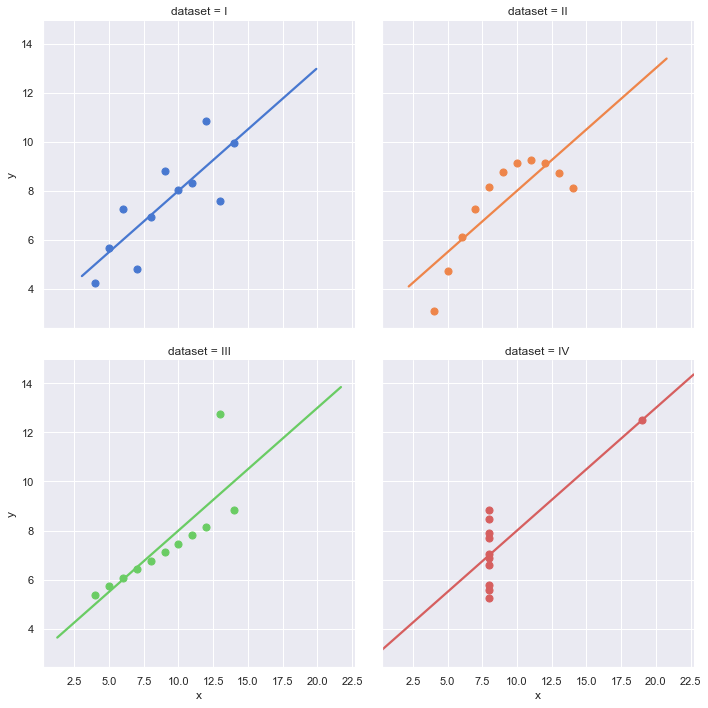

In [4]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe_df,
           col_wrap=2, ci=None, palette="muted",
           scatter_kws={"s": 50, "alpha": 1})

**Dataset 1***
Data points are spread out but have a positive correlation.

**Dataset 2***
This dataset looks like it could be quadratic.

**Dataset 3**
Perfectly linear line, but an outlier shifts the line of best fit. It is important to identify outliers and handle them properly!

**Dataset 4**
Should have a line of best fit of (x = 8) but a single outlier throws off the line completely

## Histograms, schmistograms

In [5]:
tips = sns.load_dataset("tips")

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


C:\Users\d_bea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


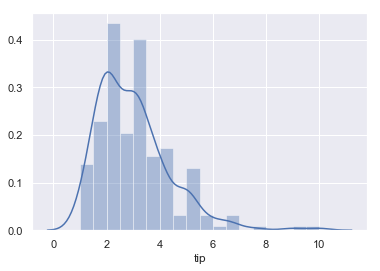

In [7]:
sns.distplot(tips.tip);

C:\Users\d_bea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


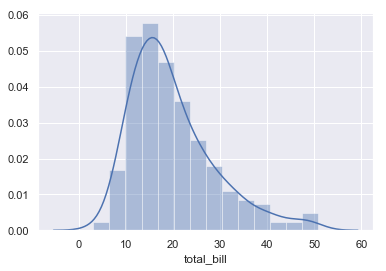

In [8]:
sns.distplot(tips.total_bill);

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

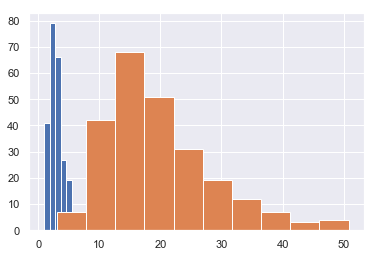

In [9]:
plt.hist(tips.tip)
plt.hist(tips.total_bill)

C:\Users\d_bea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

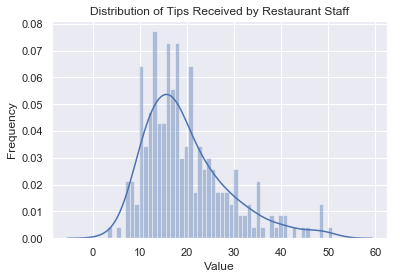

In [10]:
sns.distplot(tips.total_bill, bins=50);
plt.title("Distribution of Tips Received by Restaurant Staff")
plt.xlabel("Value")
plt.ylabel("Frequency")

## Let's natter about scatter

In [11]:
!pip install wbdata
import wbdata

In [12]:
# Find the database that has our relevant info
wbdata.get_source()

# It looks like source 40 will have population data and source 15 will have economic (gdp) data
wbdata.get_indicator(source=40)

# From this, we can see a lot of population data. I'm interested in total population, which has indicator code "SP.POP.TOTL". We can use that to get the actual data.
population = wbdata.get_data("SP.POP.TOTL")

# Let's do the same for gdp data
wbdata.get_indicator(source=15)
gdp = wbdata.get_data("NYGDPMKTPSAKD")

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
60	Economic Fitness
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
63	Human Capital Index
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
65	Health Equity and Financial Protection Indicators
40	Population estimates and projections
62	International Comparison Program (ICP) 2011
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistic

UNEMPSA_     	Unemployment rate,Percent,,,
TOTRESV      	Total Reserves
TOT          	Terms of Trade
RETSALESSA   	Retail Sales Volume,Index,,,
REER         	Real Effective Exchange Rate
NYGDPMKTPSAKN	GDP,constant 2010 LCU,millions,seas. adj.,
NYGDPMKTPSAKD	GDP,constant 2010 US$,millions,seas. adj.,
NYGDPMKTPSACN	GDP,current LCU,millions,seas. adj.,
NYGDPMKTPSACD	GDP,current US$,millions,seas. adj.,
NEER         	Nominal Effecive Exchange Rate
IPTOTSAKD    	Industrial Production, constant US$, seas. adj.
IPTOTNSKD    	Industrial Production, constant US$
IMPCOV       	Foreign Reserves, Months Import Cover, Goods
EMBIGI       	J.P. Morgan Emerging Markets Bond Index(EMBI+),,,,
EMBIG        	J.P. Morgan Emerging Markets Bond Spread (EMBI+),,,,
DXGSRMRCHSAXD	Exports Merchandise, Customs, Price, US$, seas. adj.
DXGSRMRCHSAKD	Exports Merchandise, Customs, constant US$, millions, seas. adj.
DXGSRMRCHSACD	Exports Merchandise, Customs, current US$, millions, seas. adj.
DXGSRMRCHNSXD	Exports Mer

In [13]:
population
gdp

[{'indicator': {'id': 'NYGDPMKTPSAKD',
   'value': 'GDP,constant 2010 US$,millions,seas. adj.,'},
  'country': {'id': '', 'value': 'Advanced Economies'},
  'value': '12372844.0717',
  'decimal': '0',
  'date': '2018'},
 {'indicator': {'id': 'NYGDPMKTPSAKD',
   'value': 'GDP,constant 2010 US$,millions,seas. adj.,'},
  'country': {'id': '', 'value': 'Advanced Economies'},
  'value': '48830142.4007696',
  'decimal': '0',
  'date': '2017'},
 {'indicator': {'id': 'NYGDPMKTPSAKD',
   'value': 'GDP,constant 2010 US$,millions,seas. adj.,'},
  'country': {'id': '', 'value': 'Advanced Economies'},
  'value': '47714676.9778313',
  'decimal': '0',
  'date': '2016'},
 {'indicator': {'id': 'NYGDPMKTPSAKD',
   'value': 'GDP,constant 2010 US$,millions,seas. adj.,'},
  'country': {'id': '', 'value': 'Advanced Economies'},
  'value': '46938586.5860657',
  'decimal': '0',
  'date': '2015'},
 {'indicator': {'id': 'NYGDPMKTPSAKD',
   'value': 'GDP,constant 2010 US$,millions,seas. adj.,'},
  'country': {'id

In [14]:
population_df = pd.DataFrame(population)
for index, row in population_df.iterrows():
  row['country'] = row['country']['value']
  row['indicator'] = row['indicator']['value']

In [15]:
gdp_df = pd.DataFrame(gdp)
for index, row in gdp_df.iterrows():
  row['country'] = row['country']['value']
  row['indicator'] = row['indicator']['value']

In [16]:
population_df = population_df.dropna()
gdp_df = gdp_df.dropna()

In [17]:
gdp_2017_df = gdp_df.loc[gdp_df['date'] == '2017']
population_2017_df = population_df.loc[population_df['date'] == '2017']

In [18]:
merged_df = gdp_2017_df.merge(population_2017_df, on='country')
merged_df

,country,date_x,decimal_x,indicator_x,value_x,date_y,decimal_y,indicator_y,value_y
0,World,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",75599164.7831877,2017,0,"Population, total",7530360149
1,Albania,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",14196.217927079,2017,0,"Population, total",2873457
2,Argentina,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",437997.792021953,2017,0,"Population, total",44271041
3,Australia,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",1435269.7517692,2017,0,"Population, total",24598933
4,Austria,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",450811.46705219,2017,0,"Population, total",8809212
5,Azerbaijan,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",28239.6231816089,2017,0,"Population, total",9862429
6,Bahrain,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",33789.7898805965,2017,0,"Population, total",1492584
7,Belarus,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",5797.54211444064,2017,0,"Population, total",9507875
8,Belgium,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",540308.964674053,2017,0,"Population, total",11372068
9,Bolivia,2017,0,"GDP,constant 2010 US$,millions,seas. adj.,",26374.8217102748,2017,0,"Population, total",11051600


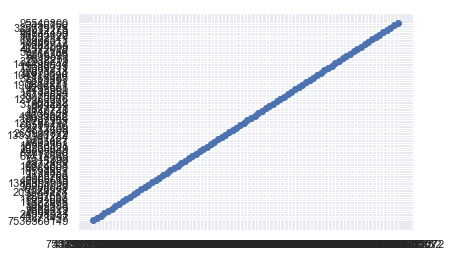

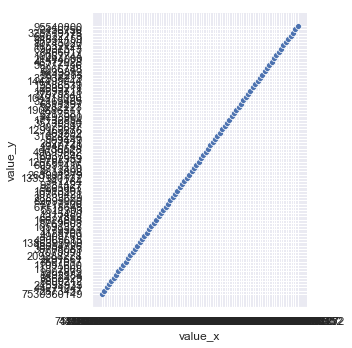

In [19]:
plt.scatter(x = merged_df.value_x, y = merged_df.value_y)
sns.relplot(x="value_x", y="value_y", data=merged_df)

## Correlograms

In [20]:
chol = pd.read_csv("http://assets.datacamp.com/blog_assets/chol.txt", sep=" ")

In [21]:
corr = chol.corr()

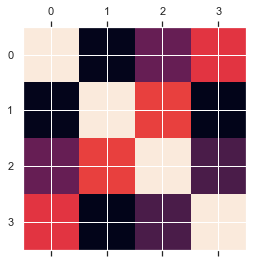

In [22]:
plt.matshow(chol.corr())

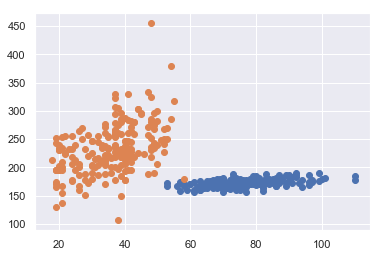

In [23]:
plt.scatter(chol.WEIGHT, chol.HEIGHT)
plt.scatter(chol.AGE, chol.CHOL)